Data set from Kaggle: [California Housing Prices](https://www.kaggle.com/datasets/camnugent/california-housing-prices?resource=download#)

Data Camp



> *Cluster the houses by location and observe how house prices fluctuate across California.*



### The Dataset

In [2]:
import pandas as pd

# DATAFRAME: home_data
# usecols parameter ->  3 variables: longitude, latitude, & median_house_value:
home_data = pd.read_csv('housing.csv', usecols = ['longitude', 'latitude', 'median_house_value'])
home_data.head()

longitude  latitude  median_house_value
0    -122.23     37.88            452600.0
1    -122.22     37.86            358500.0
2    -122.24     37.85            352100.0
3    -122.25     37.85            341300.0
4    -122.25     37.85            342200.0

### Visualize the Data

<Axes: xlabel='longitude', ylabel='latitude'>

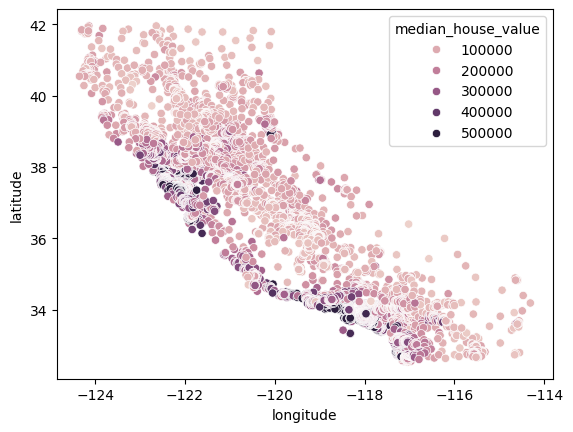

In [3]:
import seaborn as sns

sns.scatterplot(data = home_data, x = 'longitude', y = 'latitude', hue = 'median_house_value')

### Normalizing the Data

In [4]:
# Training and test splits using train_test_split from sklearn
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(home_data[['latitude', 'longitude']], home_data[['median_house_value']], test_size=0.33, random_state=0)

The test_size parameter is set to 0.33, which means that 33% of the data will be used for testing and 67% will be used for training. The random_state parameter is set to 0 to ensure that the same random split is generated each time the code is run.

In [5]:
# Normalize the training and test data using the preprocessing.normalize() method from sklearn.
from sklearn import preprocessing

X_train_norm = preprocessing.normalize(X_train)
X_test_norm = preprocessing.normalize(X_test)

The **normalize function** scales the input data so that each sample (i.e., row) has a unit norm, which means that the sum of the squares of the values in each row is equal to 1.

### Fitting and Evaluating the Model

In [7]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3, random_state = 0, n_init='auto')
kmeans.fit(X_train_norm)

KMeans(n_clusters=3, random_state=0)

<Axes: xlabel='longitude', ylabel='latitude'>

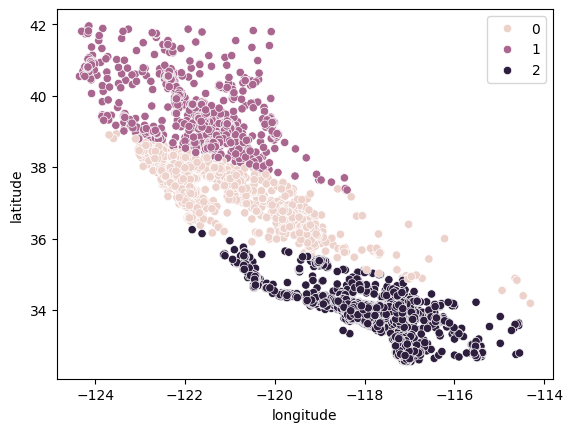

In [8]:
sns.scatterplot(data = X_train, x = 'longitude', y = 'latitude', hue = kmeans.labels_)

<ipython-input-17-5035b6fad290>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = kmeans.labels_, y = y_train['median_house_value'], palette='Paired')


<Axes: ylabel='median_house_value'>

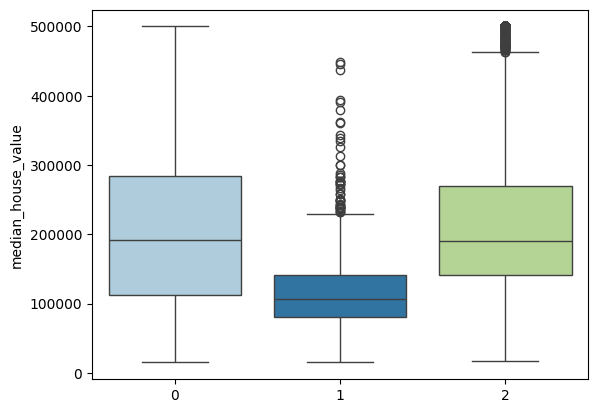

In [17]:
# Split into 3 distinct groups: Northern California, Central California, &  Southern California.
sns.boxplot(x = kmeans.labels_, y = y_train['median_house_value'], palette='Paired')

In [18]:
# The silhouette_score function is used to evaluate the quality of clustering by computing the mean silhouette coefficient of all samples.
from sklearn.metrics import silhouette_score

# metric='euclidean': the distance metric used to compute the silhouette score
silhouette_score(X_train_norm, kmeans.labels_, metric='euclidean')


0.7499371920703546

### Choosing the best number of clusters

In [19]:
K = range(2, 8)
fits = []
score = []


for k in K:
    # train the model for current value of k on training data
    model = KMeans(n_clusters = k, random_state = 0, n_init='auto').fit(X_train_norm)

    # append the model to fits
    fits.append(model)

    # Append the silhouette score to scores
    score.append(silhouette_score(X_train_norm, model.labels_, metric='euclidean'))

<Axes: xlabel='longitude', ylabel='latitude'>

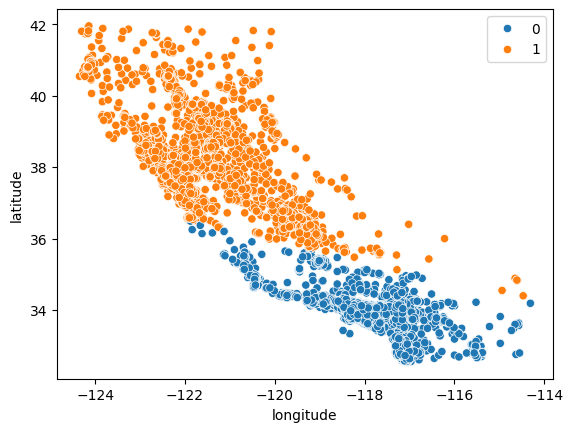

In [24]:
# Look at K = 2
sns.scatterplot(data = X_train, x = 'longitude', y = 'latitude', hue = fits[0].labels_)

<Axes: xlabel='longitude', ylabel='latitude'>

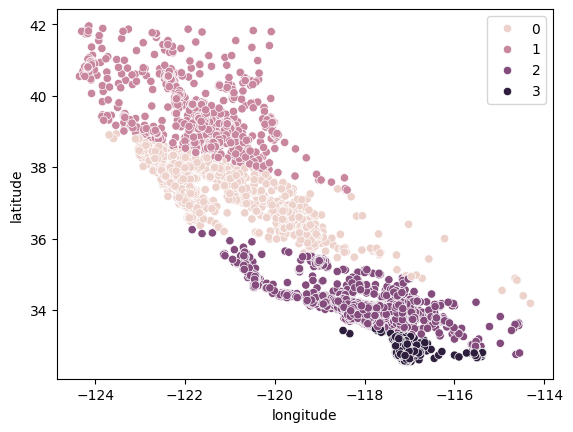

In [25]:
# Look at K = 4
sns.scatterplot(data = X_train, x = 'longitude', y = 'latitude', hue = fits[2].labels_)

<Axes: xlabel='longitude', ylabel='latitude'>

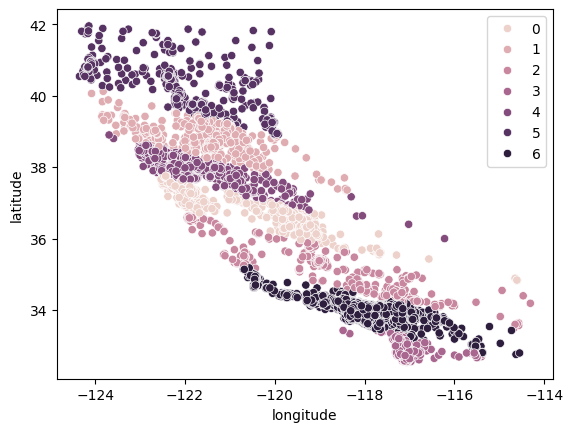

In [27]:
# Look at K = 7
sns.scatterplot(data = X_train, x = 'longitude', y = 'latitude', hue = fits[5].labels_)

<Axes: >

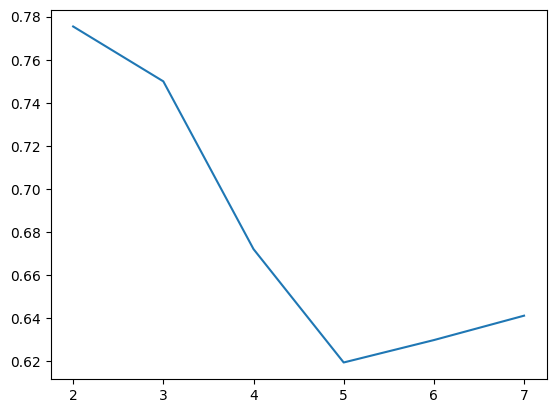

In [28]:
# CREATE A LINE PLOT
# x is a variable K
# y is a variable score
sns.lineplot(x = K, y = score)

<Axes: xlabel='longitude', ylabel='latitude'>

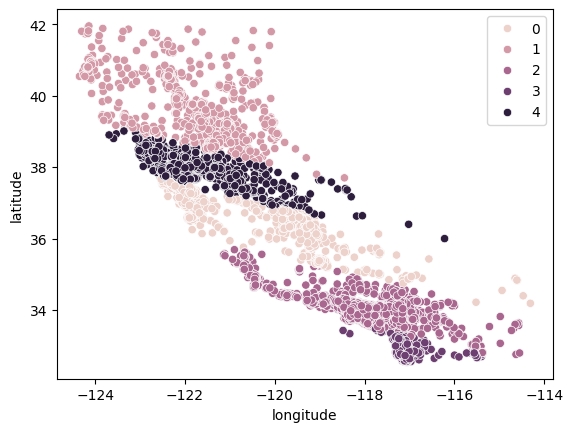

In [29]:
sns.scatterplot(data = X_train, x = 'longitude', y = 'latitude', hue = fits[3].labels_)

<ipython-input-31-12146e969562>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = fits[3].labels_, y = y_train['median_house_value'], palette='Paired')


<Axes: ylabel='median_house_value'>

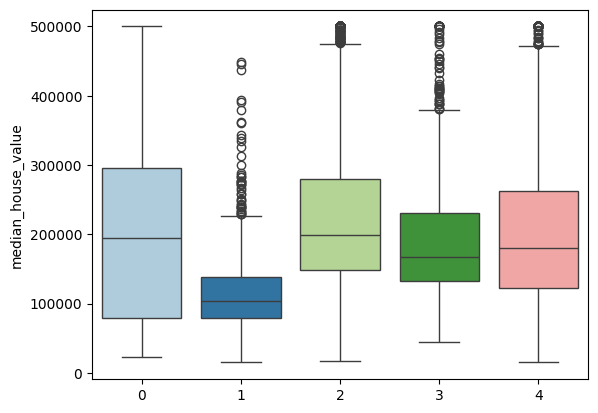

In [31]:
sns.boxplot(x = fits[3].labels_, y = y_train['median_house_value'], palette='Paired')